In [1]:
# math and data packages
import pandas as pd
import numpy as np
import math

# charting and graphics
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
from matplotlib import colors
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.dates as mdates
from matplotlib.gridspec import GridSpec

# os and file types
import os
import sys
import datetime as dt
import json
import csv

# images and display
import base64, io, IPython
from PIL import Image as PILImage
from IPython.display import Markdown as md
from IPython.display import display, Math, Latex

In [2]:
# Import data

s = pd.read_csv("resources/inprocess/combined_survey_data.csv")
inv = pd.read_csv("resources/inprocess/invasives.csv")
p = pd.read_csv("resources/inprocess/priority.csv")
r = pd.read_csv("resources/inprocess/redlist.csv")

In [3]:
# a convenience function to make pretty tables:
def make_a_summary_table(ax, data, cols_to_use, a_color='dodgerblue', font_size=12, s_et_bottom_row=True):
    """ Makes a table of values with alternate row cololrs.

    Args:
        ax: object: matplotlib table object
        data: array: the 2d array used to generate the table object
        cols_to_use: array: the list of column names
        a_color: str: matplotlib named color, face and edgecolor of table cells
        font_size: int: the font size for the table cells
        s_et_bottom_row: bool: whether or not to draw bottom line on the last row

    Returns:
        The table object formatted.
    """

    ax.auto_set_font_size(False)
    the_cells = ax.get_celld()

    line_color = colors.to_rgba(a_color)
    banded_color = (*line_color[:-1], 0.1)

    # the different areas of formatting
    top_row = [(0, i) for i, x in enumerate(cols_to_use)]
    bottom_row = [(len(data), i) for i, x in enumerate(cols_to_use)]
    top_columns = top_row[1:]
    data_rows = [x for x in list(the_cells.keys()) if x not in top_row]
    odd_rows = [x for x in data_rows if x[0] % 2 > 0]
    first_column = [x for x in data_rows if x[1] == 0]

    # make the first cell a littel smaller than the others
    ax[0, 0].set_height(1 / (len(data)))
    ax[0, 0].set_text_props(**{'va': 'top'})

    for a_cell in top_row:
        ax[a_cell].visible_edges = 'B'
        ax[a_cell].set_text_props(**{'fontsize': font_size})
        ax[a_cell].set_edgecolor('white')
        ax[a_cell].PAD = .2

    for a_cell in top_columns:
        ax[a_cell].set_height((1.25 / (len(data))))
        ax[a_cell].set_text_props(**{'va': 'center'})

        ax[a_cell].set_edgecolor(line_color)
        ax[a_cell].visible_edges = 'T'

    for a_cell in odd_rows:
        ax[a_cell].set_facecolor(banded_color)

    for a_cell in data_rows:
        ax[a_cell].set_height(.75 / (len(data)))
        ax[a_cell].visible_edges = 'BTLR'
        ax[a_cell].set_text_props(**{'fontsize': font_size})
        ax[a_cell].set_edgecolor('white')
        ax[a_cell]._text.set_horizontalalignment('center')

    for a_cell in first_column:
        ax[a_cell]._text.set_horizontalalignment('right')
        ax[a_cell].PAD = .02

    if s_et_bottom_row is True:
        for a_cell in bottom_row:
            ax[a_cell].visible_edges = 'B'
        ax[a_cell].set_edgecolor(line_color)

    return ax

# another convenience function to make pretty tables
def hide_spines_ticks_grids(an_ax):
    """Removes spines, ticks and grid from matplotlib axis object

    Args:
        an_ax: object: matplotlib axis

    Returns:
          nothing

    """
    for spine in an_ax.spines.values():
        spine.set_visible(False)
    an_ax.tick_params(bottom=False, labelbottom=False, left=False, labelleft=False)
    an_ax.grid(False)


# convenience function to make slugs out of any columsn that are not yet slugged.
def to_slug(x):
    try: 
        int_data = x.split()
        data = int_data[:2]
        data = "-".join(data)
        data = data.lower()
    except:
        data = "none"
    return data

# The plants of Biel/Bienne

## Abstract
This report concludes a 2020 -2021 project to identify plant species around Biel/Bienne. The first part of the surveys were completed between June 15th and September 30th 2020 and focused on the urban Suze river and its Madretschkanal variant. The second set of surveys were conducted between February 2021 and September 2021. The objective was to construct an initial dataset on the remnant plant populations growing in different green spaces around the city of Biel/Bienne. The zones surveyed ranged from railroad berms grazed by sheep to green areas between the sidewalk in an effort to capture the diversity of herbaceous plants around the city.

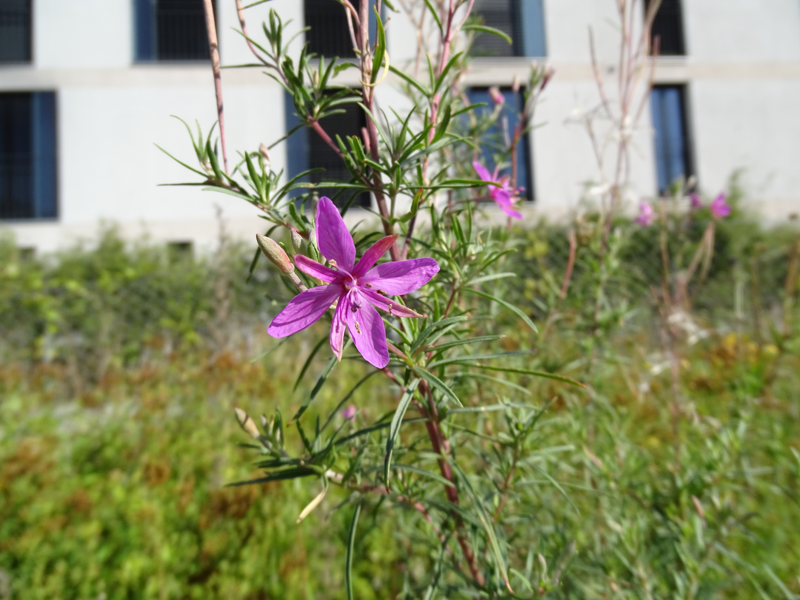

In [4]:
this_picture = PILImage.open("resources/pictures/epilobium-dodonaei.JPG")
output = io.BytesIO()
this_picture.thumbnail((800, 1200))
this_picture.save(output, format='PNG')
encoded_string = base64.b64encode(output.getvalue()).decode()

html = '<img src="data:image/png;base64,{}"/>'.format(encoded_string)
md(html)

*Epilobium dodonaei growing on the banks of the Madretschkanal*

## Year 1

### What flower is this beneath my feet?
In the first year, the primary objective was building the competencies necessary to identify plants, place the data obtained from these practice identifications into a global, national and regional context, and develop a clear picture for conducting more detailed surveys in year 2. I tested out several imaged based plant identification applications, taught myself how to use a traditional botanical key and made good use of the latest Flora Helvetica guidebook. The number of plants readily identified quickly increased, especially once I acquired a baseline of knowledge and became confident in identifying the more common and recognizable species. Rather than relying entirely on new automated plant ID systems meant that I took much longer to get started on creating a database of plant identifications than full reliance on automated ID systems (such as plantnet or  Flora Incognita), but it built the foundation of knowledge in basic plant structures needed to make more difficult determinations and move further into the field.

### What am I looking for?
Just before and alongside the initial first surveys, I conducted background reading in introductory botany, entomology, pedology, geology, and regional natural history to gain a cursory background in some of the adjascent sciences to prepare myself to dive into the technical natural science literature. Next, I reviewed available technical reports and looked at the data made available by Infoflora and the Federal Office of the Environment, specifically the biogeographical data (Welten-Sutter and 5x5 observation lists), the redlist of species and habitats, and the topic of invasive species to place my observations in the context of the work done by Swiss national experts.

It was decided to maintain the following objectives for the first year:
* Create an initial dataset of vascular plants along the Suze river
* Provide a framework to engage with the local bio-geography and the actors involved
* Identify next steps for bringing sustainable value to the local economy based on the local flora

### Survey locations and timeframe
The bulk of the survey sites occured from June to September 2020 along the suze river and its Madretschkanal variant. They lie primarily between the exit of the Suze river from the Taubenloch gorges and the end of the river into Lake Biel / Thiel river. Along this stretch of the river, as with many urban settings, there are many varied habitats, from deep shade to full pavement to (wild) flower strips maintained for ecological and aesthetic purposes. The sites are managed by the municipality to a greater or less degree and all areas surveyed were open access to the public and chosen to be reasonably accessible for an average person. The following images give some idea of some of the habitats.

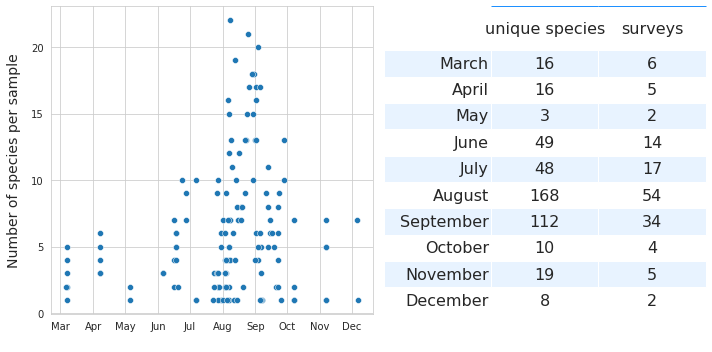

In [5]:
s['date1'] = pd.to_datetime(s.date)
sy1 = s[(s.date1 < "2020-12-31")].copy()

xlab_k14 = {'labelpad':10, 'fontsize':14}
sns.set_style('whitegrid')

fig, axs = plt.subplots(1, 2, figsize=(10,5))

ax = axs[0]

data = sy1.groupby(['loc_date', 'date1'], as_index=False).species.nunique()

sns.scatterplot(data=data, x='date1', y=data.species, ax=ax)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
# ax.get_legend().remove()
ax.set_xlabel(" ")
ax.set_ylabel("Number of species per sample", **xlab_k14)
axtwo = axs[1]

sy1['month'] = sy1.date1.dt.month_name()
sy1['eom'] = sy1['date1'].map(lambda x: pd.Period(x, freq='M').end_time.date())

data = sy1.groupby(['month', 'eom'], as_index=False).agg({'species':'nunique', 'loc_date':'nunique'})
datax = data.sort_values(by="eom")
data = datax[["month", "species", "loc_date"]].copy()
data.rename(columns={"species":"unique species", "loc_date":"surveys"}, inplace=True)

# clean up the axis
hide_spines_ticks_grids(axtwo)

# add a table to the axis with data
the_table_ax = axtwo.table(data.values,  colLabels=data.columns, colWidths=[.33, .33, .33], bbox=[0, 0, 1, 1])

# make the table pretty
a_summary_table_one = make_a_summary_table(the_table_ax,data,data.columns, font_size=16, s_et_bottom_row=False)

# remove the cell text from [0,0], the index name
a_summary_table_one.get_celld()[(0,0)].get_text().set_text(" ")

plt.tight_layout()
plt.show()

*The bulk of year 1 survey locations lay along the urban Suze river and its Madretschkanal variant*

### Some sample survey locations

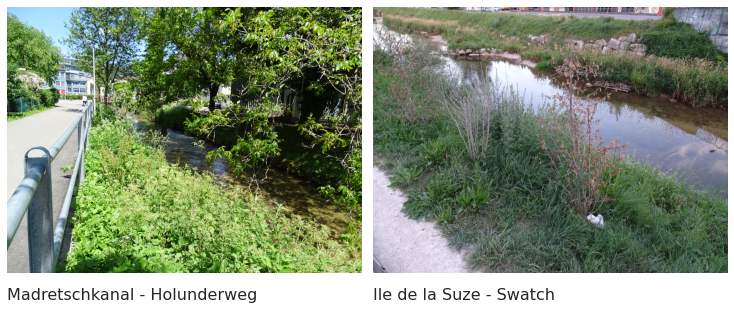

In [6]:
fig = plt.figure(figsize=(12,8))

# use pillow package to rotate images as needed
# from PIL import Image
# im1 = Image.open('resources/pictures/eupatorium-suze.JPG')
# im2 = Image.open('resources/pictures/DSC00610.JPG')

# angle = 90
# out = im1.rotate(angle)
# out.save('sc.jpg')
# out = im2.rotate(angle)
# out.save('mkc.jpg')

# check gridspec at:
# https://matplotlib.org/stable/api/_as_gen/matplotlib.gridspec.GridSpec.html
gs = GridSpec(8,14, figure=fig)

# read images
# check mp images at https://matplotlib.org/stable/tutorials/introductory/images.html
img_A = mpimg.imread('resources/pictures/suze-2.JPG')
img_B = mpimg.imread('resources/pictures/DSC04657.JPG')

# assign a grid space
axone = fig.add_subplot(gs[:, 0:6])
axtwo = fig.add_subplot(gs[:, 6:12])

# titles for each image
titles = ["Madretschkanal - Holunderweg", "Ile de la Suze - Swatch"]

# format each axis
for i, an_ax in enumerate([axone, axtwo]):
    hide_spines_ticks_grids(an_ax)
    an_ax.set_xlabel(titles[i], fontsize=16, loc='left', labelpad=15)
    
# show images
axone.imshow(img_A)
axtwo.imshow(img_B)


plt.tight_layout()
plt.show()


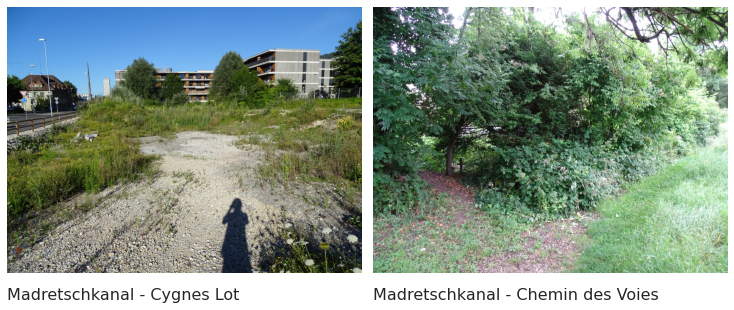

In [7]:
fig = plt.figure(figsize=(12,8))

# use pillow package to rotate images as needed
# from PIL import Image
# im1 = Image.open('resources/pictures/eupatorium-suze.JPG')
# im2 = Image.open('resources/pictures/DSC00610.JPG')

# angle = 90
# out = im1.rotate(angle)
# out.save('sc.jpg')
# out = im2.rotate(angle)
# out.save('mkc.jpg')

# check gridspec at:
# https://matplotlib.org/stable/api/_as_gen/matplotlib.gridspec.GridSpec.html
gs = GridSpec(8,14, figure=fig)

# read images
# check mp images at https://matplotlib.org/stable/tutorials/introductory/images.html
img_A = mpimg.imread('resources/pictures/DSC02009.JPG')
img_B = mpimg.imread('resources/pictures/DSC00947.JPG')

# assign a grid space
axone = fig.add_subplot(gs[:, 0:6])
axtwo = fig.add_subplot(gs[:, 6:12])

# titles for each image
titles = ["Madretschkanal - Cygnes Lot", "Madretschkanal - Chemin des Voies"]

# format each axis
for i, an_ax in enumerate([axone, axtwo]):
    hide_spines_ticks_grids(an_ax)
    an_ax.set_xlabel(titles[i], fontsize=16, loc='left', labelpad=15)
    
# show images
axone.imshow(img_A)
axtwo.imshow(img_B)


plt.tight_layout()
plt.show()

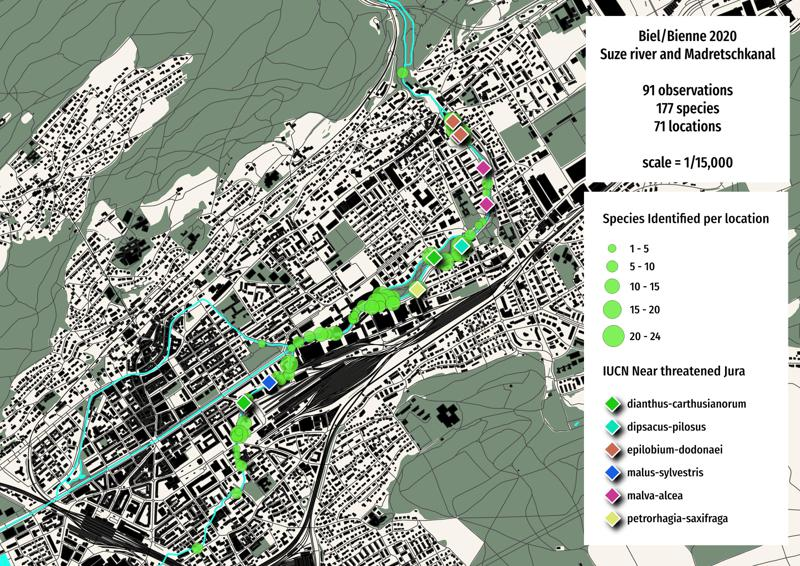

In [8]:
this_picture = PILImage.open("resources/pictures/final_map.jpeg")
output = io.BytesIO()
this_picture.thumbnail((800, 1200))
this_picture.save(output, format='jpeg')
encoded_string = base64.b64encode(output.getvalue()).decode()

html = '<img src="data:image/png;base64,{}"/>'.format(encoded_string)
md(html)

### Methodology
A survey is composed of a group of positively identified plants at a given location on a given date. Each survey attempts to answer the question “what are the different types of herbaceous plants flowering in this location?" At first I focused on herbaceous plants that I felt I had a good chance to identify, namely the tall, recognizable plants in full bloom, such as the *Eupatorium cannabinium* pictured above. Plants were identified by combining automatic plant identification tools and the 4th edition of the Flora Helvetica guidebook. For observations before 30.07.2021, I used primarily the PlantNet application, while from  31.07.2021, I used the Flora Incognita application as the principal method to record and store the species observations. The approach was the following:
1. First the plant would be identified with a picture through PlantNet or Flora Incognita
2. Highest reccomednation searched in Flora Helvetica to determine if the match was correct or not. If confirmed, the result was accepted and stored in the application.
3. If the match was unsatisfactory, the other suggested species were examined until a good match was found. 
4. If no species was a satisfactory match, it was either ignored or saved as unknown. If it was saved as unknown a sample and/or detailed pictures were taken for examination at home. In the interest of preserving the flora examined, relatively few samples were taken.
After initially attempting to follow a simple and a belt transect methodology for these surveys, I realized that the surey sites were not conducive to such a methodology nor did I have the necessary botanical experience. Since I was surveying only a range of species and only those that were in flower, I was not able to identify enough species along the transect points without laying them out in a deliberate fashion which ruins the transect. Therefore I identified to the best of my ability all of the plants on a given survey site without creating a grid reference.

### Results

#### Summary statistics

There was a wide variation in species identified and in the number of species on each site. The most common genus and species are summarized in the table below. These results should be interpreted carefully. For example, *Trifolium Pratense* and *Trifolium medium* look quite similar and are both included under *T. pratense* in this data set. In addition, *Trifolium repens* was not included in the surveys until near the end of the survey period, despite being extremely common. In addition, the near total exclusion of very common species such as *Lontodon sp.*, *Taraxacum sp.* and *crepis sp.* from this dataset certainly affects these results. This will be in part corrected in the 2021 surveys, although efficiently identifying members of the Asteraceae family takes a great deal of expertise

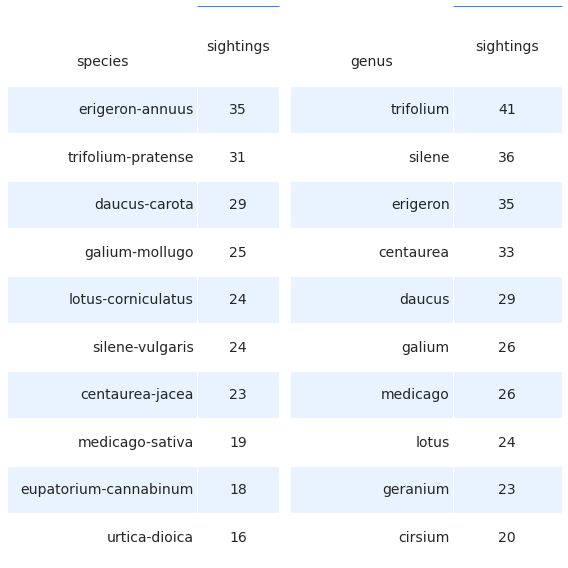

In [9]:
# top ten most commonly identified species (species_topten):
species_topten = sy1.species.value_counts().sort_values(ascending=False)[:10]

# top ten most commonly identified genus (genus_topten)
# make a column of the first word of the species_slug
sy1['genusx'] = sy1.species.str.split('-')
sy1['genus']  = sy1.genusx.map(lambda x: x[0])

# get the value counts
genus_topten = sy1.genus.value_counts().sort_values(ascending=False)[:10]

# put that in a table
fig, axs = plt.subplots(1,2, figsize=(8,8))

axone=axs[0]

data = list(zip(species_topten.index.values, species_topten.values))

collabels = ["species", "sightings"]
# clean up the axis
hide_spines_ticks_grids(axone)

# add a table to the axis with data
the_table_ax = axone.table(data,  colLabels=collabels, colWidths=[.7, .3], bbox=[0, 0, 1, 1])

# make the table pretty
a_summary_table_one = make_a_summary_table(the_table_ax,data,collabels, font_size=14, s_et_bottom_row=False)

axtwo=axs[1]

data=list(zip(genus_topten.index.values, genus_topten.values))

collabels = ["genus", "sightings"]
# clean up the axis
hide_spines_ticks_grids(axtwo)

# add a table to the axis with data
the_table_ax = axtwo.table(data,  colLabels=collabels, colWidths=[.6, .4], bbox=[0, 0, 1, 1])

# make the table pretty
a_summary_table_one = make_a_summary_table(the_table_ax,data,collabels, font_size=14, s_et_bottom_row=False)

plt.tight_layout()
plt.show()

*Top ten species and genus identified in year 1*

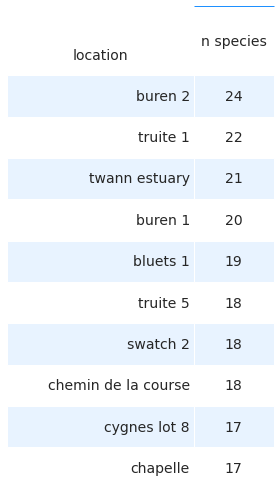

In [10]:
# The ten survey locations with the highest number of unique species (sl_mostspecies)
sl_mostspecies = sy1.groupby('place', as_index=False).species.nunique().sort_values(by='species', ascending=False)

# put that in a table
fig, axs = plt.subplots(figsize=(4,7))

axone=axs

data = sl_mostspecies[:10].values

collabels = ["location", "n species"]
# clean up the axis
hide_spines_ticks_grids(axone)

# add a table to the axis with data
the_table_ax = axone.table(data,  colLabels=collabels, colWidths=[.7, .3], bbox=[0, 0, 1, 1])

# make the table pretty
a_summary_table_one = make_a_summary_table(the_table_ax,data,collabels, font_size=14, s_et_bottom_row=False)

plt.tight_layout()
plt.show()

*Locations with the 10 highest number of different species identified*

#### Redlist species & invasive species identified

There were no species identified as endangered, regionally extinct or critically endangered on a national or regional level. Considering the surveys were all conducted in areas easily accessible by public transportation and the preponderance of observations come from urban Biel/Bienne, this should come as no surprise.

Three species fell under the criteria of vulnerable. *Achillea ptarmica*, vulnerable on a national level, was identified in the Cheyres nature reserve on the shores of Lac de Neuchatel. *Allium carinatum* listed as regionally vulnerable, was identified in a nature reserve in Interlaken, on the shores of Lake Thun. *Dianthus carthusianorum* was identified in Biel, but it is unlikely that remnant populations were identified given how widespread *Dianthus c.* is used in commercial horticulture.

The  species are categorized as "Least Concern" or "Near Threatened" on a regional or national level. 

In [11]:
# prepatory work for subsequent data analysis

# rename the columns with the following dictionairies
endangerdict = {
    "LC": "Least Concern",
    "NT": "Near Threatened",
    "VU": "Vulnerable",
    "EN": "Endangered",
    "CR": "Critically Endangered",
    "DD": "Data deficient",
    "NE": "Not Evaluated",
    "RE": "Regionally Extinct",
    "CR": "Critically Endagered, probably extinct",
    "-": "UNKNOWN",
    "NA": "NA"
}

# map this to
# df.this_key.map(lamda x: region_dict[x])
regiondict = {
    "JU": "Jura",
    "MP": "Central Plateau",
    "CH": "National"
}

def to_species_slug(x):
    try: 
        int_data = x.split()
        data = "-".join(int_data)
        data = data.lower()
    except:
        data = "none"
    return data

# make slugs out of red list species names to make data comparable
r['slug'] = r.species.map(lambda x: to_species_slug(x))

rnat = r[['slug', 'CH']].set_index('slug')
rju = r[['slug', 'JU']].set_index('slug')
rmp = r[['slug', 'MP']].set_index('slug')
def assign_rlist_status_to_survey_data(x, amap):
    try:
        data=amap.loc[x][0]
    except:
        data="ND"
    
    return data

sy1["CH"] = sy1.species.map(lambda x: assign_rlist_status_to_survey_data(x, amap=rnat))
sy1["JU"]= sy1.species.map(lambda x: assign_rlist_status_to_survey_data(x, amap=rju))
sy1["MP"]= sy1.species.map(lambda x: assign_rlist_status_to_survey_data(x, amap=rmp))

a = sy1.groupby(['species', 'CH', 'JU', 'MP'], as_index=False).agg({'loc_date':'nunique', 'place':'nunique'})

# species with no data from red list
norlist_data = a[a.CH == 'ND']


In [12]:
# group together all categories higher than vulnerable - result is an empty set.

en_plus = sy1[(sy1.CH=="EN")|(sy1.CH == "CR")|(sy1.CH == "RE")|(sy1.MP =="EN")|(sy1.MP == "CR")|(sy1.MP == "RE")|(sy1.JU =="EN")|(sy1.JU == "CR")|(sy1.JU == "RE")].copy()

# vulnerable on a regional or national level - only three species fit this category, they are dealt with individually
vu = sy1[(sy1.CH=="VU")|(sy1.JU == "VU")|(sy1.MP == "VU")].copy()
vulnerable_species = vu.species.unique()

# near threatened - decently large category

# comments on nationally NT
# rorippa-islandica -> rorippa-palustris, id confusion.
# malus-sylvestris -> malus sylvaticum (most likely), id confusion
# geranium-pratense -> highly cultivated species, species correct but genetic lineage likely a cultivar.
# linaria repens -> looks correct, in Thun
# alium carinatum -> looks correct, in Thun
# cyclamen hederifolium -> delete, not relevant, not a real site.
# dispascus pilosus -> very sure its correct, checked in 2021, but river level changed dramatically so it didn't have a chance to regrow.
# epilobium dodonaei -> somewhat cultivated species, likely cultivated in the area where it was identified.


# comments on regional NT
# carduus-personata -> picture not available to confirm, same spot as dispsacus pilosus so
# carduus-crispus -> good
# scabiosa-columbaria -> good 
# tragopogon-pratensis -> good, slightly cultivated, could be spontaneous or purchased
# epilobium dodonaei -> somewhat cultivated species, likely cultivated in the area where it was identified.
# centaurea scabiosa -> very cultivated species, likey planted
# petrorhagia-saxifraga -> good, could be cultivated
# stachys-recta -> good, could be cultivated
# rosa-spinossiuma -> probably wrong, certainly planted as part of renaturalization
# campanula-rhomboidalis -> good, found in taubenloch, wild species, not NT in JU (Taubenloch) only in MP , but its close to the border so OK
# succisa-pratensis -> scabiosa columbaria, id confusion
#lathyrus-sylvestris -> good, not great ID, also not really a cultivar, looks good from distro map and status.
# prunella-grandiflora -> good, not great ID, often a cultivar, in a sown area.

# make regional and total NT species lists

nt = sy1[(sy1.CH=="NT")|(sy1.JU == "NT")|(sy1.MP == "NT")].copy()
near_threat_species = nt.species.unique()

nt_mp = sy1[sy1.MP == "NT"].copy()
nt_ju = sy1[sy1.JU == "NT"].copy()
nt_ch = sy1[sy1.CH == "NT"].copy()

ntch = nt_ch.species.unique()
ntju = nt_ju.species.unique()
ntmp = nt_mp.species.unique()

# make a table of the LC NT VU EN+ values by region (columns

In [13]:
data = nt_mp

In [14]:
# put that in a table
# fig, axs = plt.subplots(figsize=(9,len(data)*.7))

# axone=axs

# collabels = data.columns

# clean up the axis
# hide_spines_ticks_grids(axone)

# add a table to the axis with data
# the_table_ax = axone.table(data.values,  colLabels=collabels, colWidths=[.15, .25, .2, .08, .08, .08], bbox=[0, 0, 1, 1])

# make the table pretty
# a_summary_table_one = make_a_summary_table(the_table_ax,data.values,collabels, font_size=12, s_et_bottom_row=False)

# plt.tight_layout()
# plt.show()

Invasive species

In [22]:
inv['species'] = inv['Latin']

def to_species_slug_full_name(x):
    try: 
        int_data = x[:x.rfind(' ')]
        data = int_data.split()
        print(len(data))
        data = "-".join(data)
        data = data.lower()
    except:
        data = "none"
    return data

inv['slug'] = inv.species.map(lambda x: to_species_slug_full_name(x))
inv.head()

2
3
2
2
2
2
2
2
3
3
2
6
2
5
4
4
3
2
2
2
5
5
2
3
2
2
2
3
2
4
4
2
2
2
2
2
2
2
2
2
3
4
2
14
5
2
2
2
3
6
3
7
3
2
2
3
4
5


,Latin,French,Jura,Plateau,Versant Nord des Alpes,Alpes centrales Ouest,Alpes centrales Est,Versant Sud des Alpes,non établi en Suisse,1 Eau1 libres,...,santé,"écologie, biodiversité",économie,"Präventionscharakter (hoch=1, mittel=2, gering=3)","Regionale Wichtigkeit (hoch=1, mittel=2, gering=3)","Lack List / Watch List ""old""",list_2014,Ordonnonce sur la dissémination des organismes (ODE),species,slug
0,Abutilon theophrasti Medik.,Abutilon de Théophraste,1.0,1.0,1.0,NaN,NaN,1.0,NaN,NaN,...,o,1,3,2,2,-,BL,-,Abutilon theophrasti Medik.,abutilon-theophrasti
1,Ailanthus altissima (Mill.) Swingle,Ailante,2.0,3.0,1.0,2.0,1.0,3.0,NaN,NaN,...,1,2,2,3,3,BL,BL,-,Ailanthus altissima (Mill.) Swingle,ailanthus-altissima-(mill.)
2,Ambrosia artemisiifolia L.,Ambroisie à feuilles d'armoise,3.0,3.0,1.0,2.0,1.0,3.0,NaN,NaN,...,3,-1,3,3,2,BL,BL,ODE,Ambrosia artemisiifolia L.,ambrosia-artemisiifolia
3,Amorpha fruticosa L.,Amorphe buissonnante,1.0,-1.0,NaN,NaN,NaN,2.0,NaN,NaN,...,o,3,2,1,1,WL,BL,-,Amorpha fruticosa L.,amorpha-fruticosa
4,Artemisia verlotiorum Lamotte,Armoise des frères Verlot,2.0,3.0,2.0,2.0,1.0,3.0,NaN,NaN,...,1(?),2,2,3,3,BL,BL,-,Artemisia verlotiorum Lamotte,artemisia-verlotiorum


*Map of near threatened species identified in 2021*

### Recomendations from the first year
 In order to build on this experience from 2020, the following was reccommended for a 2021 round of surveying:
* The surveys should be repeated starting from February or March 2021 to capture earlier blooming plant species (especially in March, April and May)
* The surveys should include not just the areas adjascent to the riverbodies but include the rest of the city as well, especially some of the semi-wild areas left around the city.
* Surveys should include identifcation of a much greater percentage of the plants encountered now that I have more experience in plant identification.
* Integration of plant data from the City of Bienne (Cadastre des arbres)
* Use of Info Flora's FlorApp or a dedicated botany journal to exclusively record observations.

In [ ]:
# insert a pretty image break thing

## Year 2 

### The second iteration
The reccomendations of the first year provided a strong foundation on which to build a second iteration of the survey project. The primary goal of the second iteration was to build a more robust dataset with the following improvements in mind:
- Expand the number of flowering plant species included in the surveys
- Expand the diversity of urban and periurban sites surveyed
- visit sites early in the year
- identify and test a suitable data recording methodology for this purpose
- identify sources of data that can be integrated into the analysis

There were some tweaks to the methodology from Year 1 and adjustments were made throughout Year 2 to find a suitable survey method and identify data that can be obtained from other sources and not recorded directly (such as the surface area of the green spaces surveyed) to reduce the amount of time per survey.

### Locations and timeframe

In [ ]:
# image of some survey locations

In [ ]:
# replicate the tables from year 1

In [ ]:
# replicate the map from year 1

### Results

#### Summary

In [ ]:
# summary stats of the data set
# 

#### Threatened and priority species
Discussion of the threatened and priority species identified

In [ ]:
# Threatened species graphic / table (?) with year 1 and year 2 visible

#### Invasive species

In [ ]:
# Invasive species table

## Year 3

### A robust surveillance of Biel/Bienne and immediate surroundings
Thanks to the experience of the previous two years, a robust surveillance and reporting framework can be proposed to the city of Biel to aid city managers in development and maintenance decisions in recognition of their responsibility and in accordance with the regional needs of vascular plant populations:

- surveillance strategy
- integration with additional 

first year, I was able to.

* In addition to surveying, value should be created during the survey itself through seed collection or removal of invasive plant species.

* 
